# Akmal Muzakki (1305210087)

# Import Libraries

In [19]:
!pip install graphviz

In [140]:
import numpy as np
import scipy.sparse as sp_sparse
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
import sklearn.utils as utils
import sklearn.tree as tree
import sklearn.svm as svm
import sklearn.linear_model as linear_model
import sklearn.model_selection as model_selection

import gensim.models
import gensim.utils as g_utils
import gensim.downloader as api

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction import text as sk_text

from gensim.models.doc2vec import TaggedDocument
from gensim.models import Word2Vec
from gensim.models import Doc2Vec

import graphviz

%matplotlib inline

# Feature Selection

## Variance Threshold

In [34]:
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
print(np.array(X))
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 1]
 [0 1 0]
 [0 1 1]]


array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

Program di atas menggunakan pustaka NumPy dan Scikit-learn untuk melakukan seleksi fitur dengan metode threshold variance.

Pada bagian pertama program, terdapat sebuah array 2D X yang berisi data numerik. Kemudian, VarianceThreshold digunakan dengan nilai threshold sebesar 0.8 * (1 - 0.8) = 0.16 untuk melakukan seleksi fitur. Hasil transformasi data setelah seleksi fitur ditampilkan pada output.

Pada bagian kedua program, dataset iris dari scikit-learn digunakan sebagai contoh. VarianceThreshold juga digunakan dengan nilai threshold sebesar 0.2 untuk melakukan seleksi fitur pada dataset iris. Hasil transformasi pada baris ke-1 hingga ke-10 dari dataset iris ditampilkan pada output. Selain itu, nilai variance dari setiap fitur pada dataset iris juga ditampilkan pada output.

## Univariate Feature Selection

In [36]:
iris = sk_data.load_iris()
X, y = iris.data, iris.target
print(X.shape)
print('Features: ')
print(X[1:10,:])
print('Labels: ')
print(y[1:10])
sel = SelectKBest(chi2, k=2)
X_new = sel.fit_transform(X, y)
print('Selected features: ')
print(X_new[1:10])

(150, 4)
Features: 
[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
Labels: 
[0 0 0 0 0 0 0 0 0]
Selected features: 
[[1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]]


In [37]:
print('Chi2 values')
print(sel.scores_)
c, p = sk.feature_selection.chi2(X, y)
print('Chi2 values')
print(c)
print('p-values')
print(p)

Chi2 values
[ 10.81782088   3.7107283  116.31261309  67.0483602 ]
Chi2 values
[ 10.81782088   3.7107283  116.31261309  67.0483602 ]
p-values
[4.47651499e-03 1.56395980e-01 5.53397228e-26 2.75824965e-15]


Program di atas menggunakan dataset iris dari scikit-learn dan melakukan seleksi fitur dengan metode chi-squared test.

Pada bagian pertama program, dataset iris dibagi menjadi variabel fitur (X) dan variabel target (y) dengan menggunakan metode load_iris() dari scikit-learn. Kemudian, bentuk dari variabel fitur ditampilkan pada output.

Pada bagian selanjutnya, SelectKBest digunakan dengan metode chi2 dan nilai k=2 untuk melakukan seleksi fitur pada dataset iris. Hasil transformasi setelah seleksi fitur ditampilkan pada output.

Selain itu, nilai chi-squared dan p-value untuk setiap fitur pada dataset iris juga ditampilkan pada output. Chi-squared dan p-value dapat digunakan untuk mengevaluasi korelasi antara fitur dengan target dan memilih fitur yang signifikan dalam menjelaskan variabilitas target.

# Supervised Learning

# Preparing the data

In [38]:
iris = load_iris()
print("Sample of data")
print(iris.data[:5,:])
print("The class labels vector")
print(iris.target)
print("The names of the classes:", iris.target_names)
print(iris.feature_names)

Sample of data
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
The class labels vector
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
The names of the classes: ['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [39]:
X, y = utils.shuffle(iris.data, iris.target, random_state=1)
print(X.shape)
print(y.shape)
print(y)

(150, 4)
(150,)
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1 2 0 0 0 1 0 0 2 2 2 2 2 1 2 1 0 2 2 0 0 2 0 2 2 1 1 2 2 0
 1 1 2 1 2 1 0 0 0 2 0 1 2 2 0 0 1 0 2 1 2 2 1 2 2 1 0 1 0 1 1 0 1 0 0 2 2
 2 0 0 1 0 2 0 2 2 0 2 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 2 0 0 2 1 2 1 2 2 1
 2 0]


In [40]:
train_set_size = 100
X_train = X[:train_set_size]
y_train = y[:train_set_size]
X_test = X[train_set_size:]
y_test = y[train_set_size:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(100, 4) (100,)
(50, 4) (50,)


Program di atas adalah contoh implementasi penggunaan library scikit-learn untuk memuat dataset iris dan melakukan pemisahan dataset menjadi data training dan data testing dengan menggunakan fungsi train_test_split. Dataset iris terdiri dari 150 sampel data dengan masing-masing sampel terdiri dari 4 fitur dan terdapat 3 kelas target. Pada program ini, terlebih dahulu dilakukan pengacakan (shuffle) terhadap dataset, kemudian dipisahkan menjadi data training dan data testing dengan menggunakan metode pemisahan secara acak (random split) dan metode pemisahan dengan proporsi tertentu (test_size=0.4).

# Classification Models

## Decision Trees

In [42]:
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

print("Classifier accuracy: ", dtree.score(X_test, y_test))

y_pred = dtree.predict(X_test)
y_prob = dtree.predict_proba(X_test)
print("Classifier predictions: ", y_pred[:10])
print("Ground truth labels: ", y_test[:10])
print(y_prob[:10])

Classifier accuracy:  0.95
Classifier predictions:  [2 1 0 2 0 2 0 1 1 1]
Ground truth labels:  [2 1 0 2 0 2 0 1 1 1]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [43]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))
print("\nConfusion matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nPrecision Score per class")
print(metrics.precision_score(y_test,y_pred,average=None))
print("\nAverage Precision Score")
print(metrics.precision_score(y_test,y_pred,average='weighted'))
print("\nRecall Score per class")
print(metrics.recall_score(y_test,y_pred,average=None))
print("\nAverage Recall Score")
print(metrics.recall_score(y_test,y_pred,average='weighted'))
print("\nF1-score Score per class")
print(metrics.f1_score(y_test,y_pred,average=None))
print("\nAverage F1 Score")
print(metrics.f1_score(y_test,y_pred,average='weighted'))

accuracy: 0.95

Confusion matrix
[[16  0  0]
 [ 0 22  1]
 [ 0  2 19]]

Precision Score per class
[1.         0.91666667 0.95      ]

Average Precision Score
0.9505555555555555

Recall Score per class
[1.         0.95652174 0.9047619 ]

Average Recall Score
0.95

F1-score Score per class
[1.         0.93617021 0.92682927]

Average F1 Score
0.949922158796056


In [141]:
print(iris.feature_names)
dot_data = tree.export_graphviz(dtree,out_file=None)
graph = graphviz.Source(dot_data)
graph

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [142]:
dtree2 = tree.DecisionTreeClassifier(max_depth=2)
dtree2 = dtree2.fit(X_train, y_train)
print(dtree2.score(X_test, y_test))
dot_data2 = tree.export_graphviz(dtree2,out_file=None)
graph2 = graphviz.Source(dot_data2)
graph2

0.8666666666666667


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

Program di atas menggunakan decision tree classifier dari library scikit-learn untuk melakukan klasifikasi pada dataset iris yang telah dipisahkan menjadi data training dan data testing. Pertama-tama, decision tree classifier diinisialisasi dan dilatih dengan data training. Kemudian, dilakukan prediksi pada data testing dan diperoleh nilai akurasi, confusion matrix, precision, recall, dan f1-score sebagai evaluasi kinerja dari model klasifikasi tersebut. Selanjutnya, dilakukan visualisasi decision tree yang dihasilkan menggunakan library graphviz. Selain itu, dilakukan juga percobaan dengan membatasi kedalaman (max_depth) dari decision tree dan dilakukan visualisasi decision tree tersebut.

## k-NN Classification

In [49]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('classifier score: ', knn.score(X_test, y_test))
y_pred = knn.predict(X_test)

classifier score:  0.9333333333333333


In [ ]:
print("\naccuracy:",metrics.accuracy_score(y_test,y_pred))
print("\nConfusion matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nPrecision Score # class")
print(metrics.precision_score(y_test,y_pred,average=None))
print("\nAverage Precision Score")
print(metrics.precision_score(y_test,y_pred,average='weighted'))
print("\nRecall Score per class")
print(metrics.recall_score(y_test,y_pred,average=None))
print("\nAverage Recall Score")
print(metrics.recall_score(y_test,y_pred,average='weighted'))
print("\nF1-score Score per class")
print(metrics.f1_score(y_test,y_pred,average=None))
print("\nAverage F1 Score")
print(metrics.f1_score(y_test,y_pred,average='weighted'))

Program di atas menggunakan K-Nearest Neighbors Classifier (KNN) dari library scikit-learn untuk melakukan klasifikasi pada dataset iris yang telah dipisahkan menjadi data training dan data testing. Pada program ini, KNN diinisialisasi dengan nilai K=3, dilatih dengan data training, dan kemudian dilakukan prediksi pada data testing. Hasil prediksi digunakan untuk menghitung berbagai metrik evaluasi kinerja model klasifikasi seperti akurasi, confusion matrix, precision, recall, dan f1-score. Metrik-metrik tersebut digunakan untuk mengevaluasi kinerja model dan menentukan seberapa baik model tersebut dalam melakukan klasifikasi pada dataset iris.

## SVM Classification

In [51]:
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)
print('classifier score: ', svm_clf.score(X_test, y_test))
y_pred = svm_clf.predict(X_test)

classifier score:  0.9333333333333333


In [52]:
print("\naccuracy:",metrics.accuracy_score(y_test,y_pred))
print("\nConfusion matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nPrecision Score # class")
print(metrics.precision_score(y_test,y_pred,average=None))
print("\nAverage Precision Score")
print(metrics.precision_score(y_test,y_pred,average='weighted'))
print("\nRecall Score per class")
print(metrics.recall_score(y_test,y_pred,average=None))
print("\nAverage Recall Score")
print(metrics.recall_score(y_test,y_pred,average='weighted'))
print("\nF1-score Score per class")
print(metrics.f1_score(y_test,y_pred,average=None))
print("\nAverage F1 Score")
print(metrics.f1_score(y_test,y_pred,average='weighted'))


accuracy: 0.9333333333333333

Confusion matrix
[[16  0  0]
 [ 0 22  1]
 [ 0  3 18]]

Precision Score # class
[1.         0.88       0.94736842]

Average Precision Score
0.935578947368421

Recall Score per class
[1.         0.95652174 0.85714286]

Average Recall Score
0.9333333333333333

F1-score Score per class
[1.         0.91666667 0.9       ]

Average F1 Score
0.9330555555555555


Program di atas menggunakan Support Vector Machine (SVM) dari library scikit-learn untuk melakukan klasifikasi pada dataset iris yang telah dipisahkan menjadi data training dan data testing. Pada program ini, SVM diinisialisasi dengan kernel default 'rbf', dilatih dengan data training, dan kemudian dilakukan prediksi pada data testing. Hasil prediksi digunakan untuk menghitung berbagai metrik evaluasi kinerja model klasifikasi seperti akurasi, confusion matrix, precision, recall, dan f1-score. Metrik-metrik tersebut digunakan untuk mengevaluasi kinerja model dan menentukan seberapa baik model tersebut dalam melakukan klasifikasi pada dataset iris.

## Logistic Regression

In [53]:
lr_clf = linear_model.LogisticRegression(solver='lbfgs')
lr_clf.fit(X_train, y_train)
print('classifier score: ', lr_clf.score(X_test, y_test))
y_pred = lr_clf.predict(X_test)

classifier score:  0.9166666666666666


In [54]:
print("\naccuracy:",metrics.accuracy_score(y_test,y_pred))
print("\nConfusion matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nPrecision Score # class")
print(metrics.precision_score(y_test,y_pred,average=None))
print("\nAverage Precision Score")
print(metrics.precision_score(y_test,y_pred,average='weighted'))
print("\nRecall Score per class")
print(metrics.recall_score(y_test,y_pred,average=None))
print("\nAverage Recall Score")
print(metrics.recall_score(y_test,y_pred,average='weighted'))
print("\nF1-score Score per class")
print(metrics.f1_score(y_test,y_pred,average=None))
print("\nAverage F1 Score")
print(metrics.f1_score(y_test,y_pred,average='weighted'))


accuracy: 0.9166666666666666

Confusion matrix
[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]

Precision Score # class
[1.         0.84615385 0.94444444]

Average Precision Score
0.9215811965811966

Recall Score per class
[1.         0.95652174 0.80952381]

Average Recall Score
0.9166666666666666

F1-score Score per class
[1.         0.89795918 0.87179487]

Average F1 Score
0.9160125588697017


In [55]:
probs = lr_clf.predict_proba(X_test)
print('Class probabilities (first 10):')
print(probs[:10])
print(y_test[:10])
print(probs.argmax(axis=1)[:10])
print(probs.max(axis=1)[:10])

Class probabilities (first 10):
[[3.31268620e-04 1.22812781e-01 8.76855950e-01]
 [1.49073654e-02 9.68438212e-01 1.66544226e-02]
 [9.87117165e-01 1.28825421e-02 2.92956825e-07]
 [3.90825443e-06 4.07650404e-02 9.59231051e-01]
 [9.70874163e-01 2.91252304e-02 6.06746470e-07]
 [6.11405884e-06 1.15477255e-02 9.88446160e-01]
 [9.82263653e-01 1.77360426e-02 3.04444893e-07]
 [4.18438945e-03 7.27172729e-01 2.68642882e-01]
 [2.31528228e-03 7.61349535e-01 2.36335183e-01]
 [2.61148376e-02 9.31808632e-01 4.20765306e-02]]
[2 1 0 2 0 2 0 1 1 1]
[2 1 0 2 0 2 0 1 1 1]
[0.87685595 0.96843821 0.98711716 0.95923105 0.97087416 0.98844616
 0.98226365 0.72717273 0.76134953 0.93180863]


In [56]:
print(lr_clf.coef_)

[[-0.4485156   0.66924079 -2.14532259 -0.93004376]
 [ 0.34220426 -0.60945965 -0.09809056 -0.63356767]
 [ 0.10631134 -0.05978115  2.24341315  1.56361143]]


Program di atas melakukan pelatihan model klasifikasi regresi logistik (logistic regression) menggunakan data yang diberikan. Setelah model dilatih, performa model dihitung dengan menggunakan metrik seperti akurasi, presisi, recall, dan F1-score. Selain itu, dilakukan juga perhitungan probabilitas kelas dan koefisien regresi logistik pada model yang dilatih.

## Linear Regression

In [58]:
x_reg = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y_reg = np.dot(x_reg, np.array([1, 2])) + 3
reg = LinearRegression().fit(x_reg, y_reg)

In [59]:
print(reg.coef_)
print(reg.intercept_)

[1. 2.]
3.0


In [60]:
print(reg.score(x_reg, y_reg))

1.0


In [61]:
reg.predict(np.array([[3, 5]]))

array([16.])

Program di atas menggunakan Linear Regression untuk melakukan prediksi nilai y dari set data x. Nilai x_reg dan y_reg merepresentasikan input dan output data training. Model Linear Regression dilatih dengan menggunakan method fit() dengan input berupa data x_reg dan y_reg. Kemudian, dengan menggunakan method coef_ dan intercept_ model ini mengembalikan nilai koefisien dan konstanta yang diperoleh dari training data. Akhirnya, dengan method score(), kinerja model dinilai berdasarkan data training yang digunakan dan dengan predict() model melakukan prediksi nilai y berdasarkan nilai x yang diberikan.

In [62]:
diabetes_X, diabetes_y = sk_data.load_diabetes(return_X_y=True)

diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = regr.predict(diabetes_X_test)

print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f'
    % metrics.r2_score(diabetes_y_test, diabetes_y_pred))
print('Prediction: ', diabetes_y_pred)
print('True values: ', diabetes_y_test)

Coefficients: 
 [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
Mean squared error: 0.59
Prediction:  [197.61846908 155.43979328 172.88665147 111.53537279 164.80054784
 131.06954875 259.12237761 100.47935157 117.0601052  124.30503555
 218.36632793  61.19831284 132.25046751 120.3332925   52.54458691
 194.03798088 102.57139702 123.56604987 211.0346317   52.60335674]
True values:  [233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]


Program di atas membaca dataset diabetes dan membaginya menjadi data training dan data test. Lalu, dilakukan pelatihan model regresi linier pada data training dan digunakan untuk memprediksi nilai diabetes pada data test. Hasil prediksi dibandingkan dengan nilai yang sebenarnya menggunakan metrik Mean Squared Error dan koefisien regresi linier dicetak.

# More Evaluation

## Computing Scores

In [63]:
p, r, f, s = metrics.precision_recall_fscore_support(y_test, y_pred)
print('Precision: ', p)
print('Recall: ', r)
print('F1: ', f)
print('Support: ', s)

Precision:  [1.         0.84615385 0.94444444]
Recall:  [1.         0.95652174 0.80952381]
F1:  [1.         0.89795918 0.87179487]
Support:  [16 23 21]


In [64]:
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      0.96      0.90        23
           2       0.94      0.81      0.87        21

    accuracy                           0.92        60
   macro avg       0.93      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



Program di atas digunakan untuk menghitung dan menampilkan beberapa metrik evaluasi untuk model klasifikasi. Metrik evaluasi yang dihitung adalah precision, recall, f1-score, dan support.

In [65]:
cancer_data = sk_data.load_breast_cancer()
X_cancer, y_cancer = utils.shuffle(cancer_data.data, cancer_data.target, random_state=1)
X_cancer_train = X_cancer[:500]
X_cancer_test = X_cancer[500:]
y_cancer_train = y_cancer[:500]
y_cancer_test = y_cancer[500:]
lr_clf.fit(X_cancer_train, y_cancer_train)
print('classifier score: ', lr_clf.score(X_cancer_test, y_cancer_test))

classifier score:  0.9565217391304348


C:\Users\akmal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Class probabilities (first 10):
[[5.20157761e-01 4.79842239e-01]
 [9.95992974e-03 9.90040070e-01]
 [9.99925016e-01 7.49835810e-05]
 [9.99565342e-01 4.34658167e-04]
 [3.25870463e-02 9.67412954e-01]
 [9.99921082e-01 7.89180018e-05]
 [7.91975480e-03 9.92080245e-01]
 [2.83950966e-03 9.97160490e-01]
 [3.73834342e-03 9.96261657e-01]
 [6.72691574e-02 9.32730843e-01]]
Precision:  [0.95454545 0.95348837 0.97619048 0.97560976 0.975      0.97435897
 0.97368421 0.97297297 0.97222222 0.97142857 0.97058824 0.96969697
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]
Recall:  [1.         0.97619048 0.97619048 0.95238095 0.92857143 0.9047619
 0.88095238 0.85714286 0.83333333 0.80952381 0.78571429 0.76190476
 0.76190476 0.73809

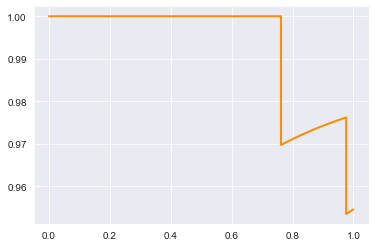

In [67]:
y_cancer_pred = lr_clf.predict(X_cancer_test)
cancer_probs = lr_clf.predict_proba(X_cancer_test)
print('Class probabilities (first 10):')
print(cancer_probs[:10])
y_cancer_scores = cancer_probs[:,1]
precission, recall, thresholds = metrics.precision_recall_curve(y_cancer_test, y_cancer_scores)
plt.plot(recall, precission, color='darkorange', lw=2)
print('Precision: ', precission)
print('Recall: ', recall)
print('Thresholds: ', thresholds)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.9902998236331569


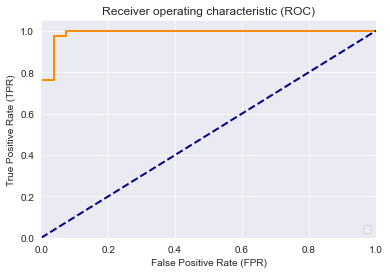

In [68]:
fpr, tpr, ths = metrics.roc_curve(y_cancer_test, y_cancer_scores)
plt.plot(fpr, tpr, color='darkorange', lw=2)
print(metrics.roc_auc_score(y_cancer_test, y_cancer_scores))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

[[0.58776791 0.41223209]
 [0.37997189 0.62002811]
 [0.02923349 0.97076651]
 [0.99776296 0.00223704]
 [0.0723674  0.9276326 ]
 [0.01956692 0.98043308]
 [0.78158014 0.21841986]
 [0.28692008 0.71307992]
 [0.02068639 0.97931361]
 [0.00236547 0.99763453]]


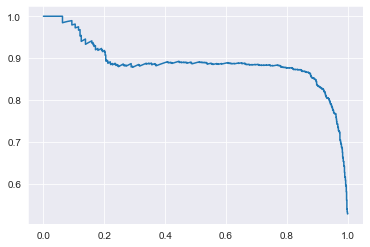

In [70]:
(Xtoy, y_toy) = sk_data.make_classification(n_samples=10000)
Xttrain = Xtoy[:8000,:]
Xttest = Xtoy[8000:,:]
yttrain = y_toy[:8000]
yttest = y_toy[8000:]

lr_clf.fit(Xttrain, yttrain)
tprobs = lr_clf.predict_proba(Xttest)
print(tprobs[:10])

y_tscores = tprobs[:,1]
precission, recall, thresholds = metrics.precision_recall_curve(yttest, y_tscores)
plt.plot(recall, precission)

Program diatas melakukan evaluasi performa model klasifikasi menggunakan metrik-metrik seperti precision, recall, F1-score, area under the receiver operating characteristic curve (AUC-ROC), dan visualisasi plot dari metrik-metrik tersebut.

Program dimulai dengan memuat dataset cancer_data, lalu membaginya menjadi data train dan test. Kemudian dilakukan training model dengan menggunakan logistic regression. Hasil prediksi dan probabilitas kelas dari test data kemudian digunakan untuk menghitung precision, recall, F1-score, dan threshold. Selanjutnya, program akan membuat plot precision-recall curve dan ROC curve, serta menampilkan nilai AUC-ROC.

Selain itu, program juga melakukan pembuatan dataset sintetis menggunakan make_classification dari scikit-learn, kemudian melakukan prediksi dan menghitung probabilitas kelas untuk data test. Hasil probabilitas kelas kemudian digunakan untuk membuat plot precision-recall curve.

## K-fold Cross Validation

In [71]:
scores = model_selection.cross_val_score(dtree, X, y, scoring='f1_weighted', cv=5)
print(scores)
print(scores.mean())

[1.         0.93333333 0.96658312 0.96658312 0.86111111]
0.9455221386800334


In [76]:
scores = model_selection.cross_validate(dtree, X, y, scoring=['precision_weighted','recall_weighted'], cv=3)
print(scores)
print(scores['test_precision_weighted'].mean(),scores['test_recall_weighted'].mean())

{'fit_time': array([0.00100017, 0.00100017, 0.0010004 ]), 'score_time': array([0.00400043, 0.00493693, 0.00200057]), 'test_precision_weighted': array([0.96      , 0.98111111, 0.88308772]), 'test_recall_weighted': array([0.96, 0.98, 0.88])}
0.9413996101364522 0.94


Program di atas melakukan evaluasi performa model Decision Tree dengan menggunakan metrik F1-weighted, precision-weighted, dan recall-weighted menggunakan fungsi cross_val_score dan cross_validate dari library model_selection di scikit-learn. Pada bagian pertama, program menggunakan cross_val_score untuk menghitung F1-weighted score dengan melakukan validasi silang (cross-validation) sebanyak 5 kali. Pada bagian kedua, program menggunakan cross_validate untuk menghitung precision-weighted dan recall-weighted dengan melakukan validasi silang sebanyak 3 kali. Hasil evaluasi performa model kemudian ditampilkan dan dicetak pada output program.

## Text Classification Example

In [77]:
categories = ['sci.space','rec.sport.baseball']
news_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), categories=categories)
print(len(news_train.target))
X_news_train_data = news_train.data
y_news_train = news_train.target
news_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), categories=categories)
print(len(news_test.target))
X_news_test_data = news_test.data
y_news_test = news_test.target

1190
791


In [78]:
X_news_train_data[0]

"I've been saying this for quite some time, but being absent from the\nnet for a while I figured I'd stick my neck out a bit...\n\nThe Royals will set the record for fewest runs scored by an AL\nteam since the inception of the DH rule.  (p.s. any ideas what this is?)\n\nThey will fall easily short of 600 runs, that's for damn sure.  I can't\nbelieve these media fools picking them to win the division (like our\nTom Gage of the Detroit News claiming Herk Robinson is some kind of\ngenius for the trades/aquisitions he's made)\n\nc-ya\n\nSean\n\n"

In [79]:
vectorizer = sk_text.TfidfVectorizer(stop_words='english', min_df=4, max_df=0.8)
X_news_train = vectorizer.fit_transform(X_news_train_data)
lr_clf = linear_model.LogisticRegression(solver='lbfgs')
lr_clf.fit(X_news_train, y_news_train)

LogisticRegression()

In [80]:
X_news_test = vectorizer.transform(X_news_test_data)
print('Classifier score: ', lr_clf.score(X_news_test, y_news_test))

Classifier score:  0.9216182048040455


Program di atas mengambil dua kategori dokumen (sci.space dan rec.sport.baseball) dari dataset 20newsgroups sebagai data latih dan data uji. Kemudian, data latih diubah menjadi matriks fitur dengan menggunakan TfidfVectorizer dari scikit-learn untuk mengukur frekuensi kata dalam dokumen. Model klasifikasi Logistic Regression dilatih dengan matriks fitur tersebut dan akurasi dari model tersebut dihitung dengan menggunakan data uji.

# Word Embeddings and Text Classification

## The Gensim Library

In [81]:
train_gsim = [g_utils.simple_preprocess(doc) for doc in X_news_train_data]
train_data_labels = [(x, y) for (x, y) in zip(train_gsim, y_news_train) if len(x) > 0]
X_news_train_gsim = [x for (x, y) in train_data_labels]
y_news_train_gsim = [y for (x, y) in train_data_labels]

In [82]:
test_gsim = [g_utils.simple_preprocess(doc) for doc in X_news_test_data]
test_data_labels = [(x, y) for (x, y) in zip(test_gsim, y_news_test) if len(x) > 0]
X_news_test_gsim = [x for (x, y) in test_data_labels]
y_news_test_gsim = [y for (x, y) in test_data_labels]

In [83]:
X_news_train_gsim[0]

['ve',
 'been',
 'saying',
 'this',
 'for',
 'quite',
 'some',
 'time',
 'but',
 'being',
 'absent',
 'from',
 'the',
 'net',
 'for',
 'while',
 'figured',
 'stick',
 'my',
 'neck',
 'out',
 'bit',
 'the',
 'royals',
 'will',
 'set',
 'the',
 'record',
 'for',
 'fewest',
 'runs',
 'scored',
 'by',
 'an',
 'al',
 'team',
 'since',
 'the',
 'inception',
 'of',
 'the',
 'dh',
 'rule',
 'any',
 'ideas',
 'what',
 'this',
 'is',
 'they',
 'will',
 'fall',
 'easily',
 'short',
 'of',
 'runs',
 'that',
 'for',
 'damn',
 'sure',
 'can',
 'believe',
 'these',
 'media',
 'fools',
 'picking',
 'them',
 'to',
 'win',
 'the',
 'division',
 'like',
 'our',
 'tom',
 'gage',
 'of',
 'the',
 'detroit',
 'news',
 'claiming',
 'herk',
 'robinson',
 'is',
 'some',
 'kind',
 'of',
 'genius',
 'for',
 'the',
 'trades',
 'aquisitions',
 'he',
 'made',
 'ya',
 'sean']

In [139]:
embedding_size = 50
cbow_model = Word2Vec(X_news_train_gsim, min_count=1, window=10, vector_size=embedding_size)

In [90]:
cbow_model.wv['pitch']

array([ 0.05933758, -0.20763446, -0.0413271 ,  0.08395874, -0.38037726,
       -0.55437905,  0.42425704,  0.85914004, -0.40944284, -0.11602718,
       -0.09127057, -0.48213986,  0.23740807,  0.43946117, -0.2967289 ,
        0.2735719 ,  0.47122806,  0.0516023 , -0.5653875 , -0.52622133,
        0.26444778,  0.17496751,  0.7312669 , -0.35970315,  0.35991833,
        0.24453188, -0.34687588,  0.25445244, -0.6697036 ,  0.03566112,
        0.08440658,  0.0344054 ,  0.08399429, -0.04006768, -0.32638487,
        0.15228857,  0.18551715, -0.07534092,  0.23885703, -0.5778701 ,
        0.40192124, -0.05932662, -0.09881862, -0.16622   ,  0.93571085,
       -0.09379991, -0.1864224 , -0.32334852,  0.28327152,  0.30936867],
      dtype=float32)

In [91]:
cbow_model.wv.most_similar('pitch')

[('home', 0.9991624355316162),
 ('until', 0.9990676641464233),
 ('strong', 0.9989771246910095),
 ('left', 0.9989693760871887),
 ('against', 0.9989672899246216),
 ('staff', 0.9989323616027832),
 ('after', 0.9989193081855774),
 ('base', 0.9989078640937805),
 ('very', 0.9988487362861633),
 ('great', 0.9988462924957275)]

In [93]:
cbow_model.wv.most_similar(positive=['chicago', 'rangers'], negative=['texas'])

[('won', 0.9975550770759583),
 ('rockies', 0.9975525140762329),
 ('east', 0.9974113702774048),
 ('sox', 0.9973748326301575),
 ('atlanta', 0.9973745942115784),
 ('toronto', 0.9973357319831848),
 ('red', 0.9971654415130615),
 ('twins', 0.9971004128456116),
 ('jays', 0.9969668388366699),
 ('boston', 0.9968999028205872)]

In [95]:
np.array([cbow_model.wv[x] for x in X_news_train_gsim[0]]).mean(axis=0)

array([ 0.10788731, -0.4348556 , -0.1519127 ,  0.14496738, -0.7584055 ,
       -1.159181  ,  0.88924724,  1.7585547 , -0.8423693 , -0.21426105,
       -0.20789692, -0.93863904,  0.47354662,  0.93693864, -0.57824546,
        0.541146  ,  1.0251347 ,  0.22916947, -1.1722467 , -1.0274755 ,
        0.5553119 ,  0.3844064 ,  1.5393734 , -0.65785664,  0.8093799 ,
        0.45676455, -0.7388402 ,  0.5687139 , -1.394374  ,  0.02351433,
        0.188298  ,  0.05201381,  0.18398151, -0.13438223, -0.6416923 ,
        0.33862254,  0.4484823 , -0.09755717,  0.5179902 , -1.1096755 ,
        0.81419176, -0.11954781, -0.1631906 , -0.33651355,  1.840603  ,
       -0.07479143, -0.36505678, -0.611805  ,  0.59586096,  0.63306296],
      dtype=float32)

In [97]:
X_news_train_cbow = [np.array([cbow_model.wv[x] for x in y]).mean(axis=0) for y in X_news_train_gsim]

In [98]:
X_news_test_cbow = [np.array([cbow_model.wv[x] for x in y if x in cbow_model.wv]).mean(axis=0) for y in X_news_test_gsim]

In [99]:
lr_clf.fit(np.array(X_news_train_cbow), np.array(y_news_train_gsim))

LogisticRegression()

In [100]:
print('Classifier score: ', lr_clf.score(np.array(X_news_test_cbow), y_news_test_gsim))

Classifier score:  0.8007915567282322


Program di atas merupakan contoh penggunaan Word2Vec dan Logistic Regression untuk klasifikasi teks. Pertama, data latih dan data uji diambil dari dataset 20 newsgroups yang terdiri dari dua kategori, yaitu sci.space dan rec.sport.baseball. Selanjutnya, data latih dan data uji diolah dengan memecah setiap dokumen menjadi kata-kata dengan menggunakan simple_preprocess dari Gensim. Setelah itu, dilakukan training model Word2Vec dengan menggunakan data latih yang telah diolah sebelumnya. Model Word2Vec yang telah ditraining digunakan untuk mengubah setiap dokumen menjadi sebuah vektor dengan menghitung rata-rata dari vektor-vektor kata-kata yang terdapat pada dokumen tersebut. Vektor-vektor dokumen yang dihasilkan digunakan sebagai input untuk training model klasifikasi menggunakan Logistic Regression. Akhirnya, performa model klasifikasi diukur dengan menggunakan data uji dan dicetak ke layar.

In [138]:
embedding_size = 50
skipgram_model = Word2Vec(X_news_train_gsim, min_count=1, window=10, vector_size=embedding_size, sg=1)

In [103]:
X_news_train_skipgram = [np.array([skipgram_model.wv[x] for x in y]).mean(axis=0) for y in X_news_train_gsim]
X_news_test_skipgram = [np.array([skipgram_model.wv[x] for x in y if x in skipgram_model.wv]).mean(axis=0) for y in X_news_test_gsim]

In [104]:
lr_clf.fit(np.array(X_news_train_skipgram), np.array(y_news_train_gsim))
lr_clf.score(np.array(X_news_test_skipgram), y_news_test_gsim)

0.9287598944591029

Program di atas merupakan implementasi untuk melatih model Word2Vec dengan metode Skip-Gram. Pada program ini, teks di preprocessing menggunakan simple_preprocess dari Gensim, kemudian dijadikan input untuk melatih model Word2Vec. Hasil dari model Word2Vec kemudian dijadikan representasi vektor yang diambil rata-rataannya pada setiap dokumen. Setelah itu, model Logistic Regression dilatih dan diuji pada data tes. Program ini bertujuan untuk menguji performa model Word2Vec dengan metode Skip-Gram pada dataset 20newsgroup untuk klasifikasi teks.

In [105]:
path = api.load("word2vec-google-news-300", return_path=True)
print(path)

[==================================================] 100.0% 1662.8/1662.8MB downloaded
C:\Users\akmal/gensim-data\word2vec-google-news-300\word2vec-google-news-300.gz


In [106]:
g_model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True)

In [107]:
print(len(g_model['hello']))
print(g_model['hello'])

300
[-0.05419922  0.01708984 -0.00527954  0.33203125 -0.25       -0.01397705
 -0.15039062 -0.265625    0.01647949  0.3828125  -0.03295898 -0.09716797
 -0.16308594 -0.04443359  0.00946045  0.18457031  0.03637695  0.16601562
  0.36328125 -0.25585938  0.375       0.171875    0.21386719 -0.19921875
  0.13085938 -0.07275391 -0.02819824  0.11621094  0.15332031  0.09082031
  0.06787109 -0.0300293  -0.16894531 -0.20800781 -0.03710938 -0.22753906
  0.26367188  0.012146    0.18359375  0.31054688 -0.10791016 -0.19140625
  0.21582031  0.13183594 -0.03515625  0.18554688 -0.30859375  0.04785156
 -0.10986328  0.14355469 -0.43554688 -0.0378418   0.10839844  0.140625
 -0.10595703  0.26171875 -0.17089844  0.39453125  0.12597656 -0.27734375
 -0.28125     0.14746094 -0.20996094  0.02355957  0.18457031  0.00445557
 -0.27929688 -0.03637695 -0.29296875  0.19628906  0.20703125  0.2890625
 -0.20507812  0.06787109 -0.43164062 -0.10986328 -0.2578125  -0.02331543
  0.11328125  0.23144531 -0.04418945  0.10839844 -

In [108]:
g_model.most_similar('pitch')

[('pitches', 0.7401653528213501),
 ('backdoor_slider', 0.5972762107849121),
 ('fastball', 0.5737807750701904),
 ('curveball', 0.5543882846832275),
 ('hanging_slider', 0.5523896217346191),
 ('hittable_pitch', 0.5503243207931519),
 ('leadoff_batter_Cliff_Floyd', 0.5496907234191895),
 ('offspeed_pitch', 0.5477588176727295),
 ('atbat', 0.5441111326217651),
 ('yaw_converters_SCADA', 0.541084885597229)]

In [109]:
g_model.most_similar(positive=['chicago', 'rangers'], negative=['texas'])

[('park_rangers', 0.5574042201042175),
 ('ranger', 0.5385411381721497),
 ('forest_rangers', 0.5039790868759155),
 ('Bwindi_Impenetrable_National', 0.47236543893814087),
 ('interpretive_rangers', 0.46525704860687256),
 ('park_ranger', 0.4612078368663788),
 ('TMNP', 0.4502459466457367),
 ('domesticated_bunnies', 0.4416167140007019),
 ('Kidepo', 0.43965375423431396),
 ('cubs', 0.4380700886249542)]

In [110]:
g_model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.549946129322052),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236843824386597),
 ('Queen_Consort', 0.5235944390296936),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

Program di atas menggunakan library gensim untuk memuat model Word2Vec-Google-News-300 yang telah terlatih sebelumnya pada dataset besar, dan menguji performa model dengan mencari kata-kata yang paling mirip dan menjalankan analogi semantik. Model ini menggunakan representasi vektor kata-kata yang terlatih pada dataset yang besar dan kompleks, yang dapat membantu dalam tugas-tugas NLP seperti analisis sentimen dan klasifikasi dokumen.

In [111]:
train_gmodel = [[g_model[x] for x in y if x in g_model] for y in X_news_train_gsim]
train_data_labels = [(x, y) for (x, y) in zip(train_gmodel, y_news_train) if len(x) > 0]
X_news_train_gm = [np.array(x) for (x, y) in train_data_labels]
y_news_train_gm = [y for (x, y) in train_data_labels]

In [112]:
X_news_train_gmodel = [x.mean(axis=0) for x in X_news_train_gm]

In [113]:
test_gmodel = [[g_model[x] for x in y if x in g_model] for y in X_news_test_gsim]
test_data_labels = [(x,y) for (x,y) in zip(test_gmodel, y_news_test) if len(x) > 0]
X_news_test_gm = [np.array(x) for (x,y) in test_data_labels]
y_news_test_gm = [y for (x,y) in test_data_labels]

In [114]:
X_news_test_gmodel = [x.mean(axis=0) for x in X_news_test_gm]

In [115]:
lr_clf.fit(X_news_train_gmodel, np.array(y_news_train_gm))

LogisticRegression()

In [116]:
lr_clf.score(np.array(X_news_test_gmodel), y_news_test_gm)

0.49340369393139843

In [117]:
print(api.load('glove-wiki-gigaword-50', return_path=True))

[==================================================] 100.0% 66.0/66.0MB downloaded
C:\Users\akmal/gensim-data\glove-wiki-gigaword-50\glove-wiki-gigaword-50.gz


Program diatas melakukan embedding teks menggunakan model pre-trained Word2Vec-Google-News-300 dan melakukan klasifikasi teks dengan menggunakan Logistic Regression. Selain itu, program juga melakukan embedding teks menggunakan model pre-trained GloVe-Wiki-Gigaword-50 dan melakukan evaluasi klasifikasi teks menggunakan skor akurasi.

In [118]:
glove_model = api.load('glove-wiki-gigaword-50')

In [119]:
glove_model.most_similar('pitch')

[('pitches', 0.8380102515220642),
 ('pitching', 0.775322675704956),
 ('ball', 0.7705615162849426),
 ('infield', 0.769540548324585),
 ('inning', 0.7672455906867981),
 ('game', 0.7510353326797485),
 ('hitters', 0.7493574619293213),
 ('outfield', 0.7477314472198486),
 ('hitter', 0.7467021346092224),
 ('pitched', 0.7417561411857605)]

In [120]:
glove_model.most_similar(positive=['chicago', 'rangers'], negative=['texas'])

[('blackhawks', 0.7986295223236084),
 ('sabres', 0.7900724411010742),
 ('canucks', 0.787615180015564),
 ('canadiens', 0.7621992826461792),
 ('leafs', 0.7570874691009521),
 ('bruins', 0.7503584623336792),
 ('oilers', 0.7478305697441101),
 ('dodgers', 0.7437342405319214),
 ('phillies', 0.7399099469184875),
 ('mets', 0.7378402352333069)]

In [121]:
glove_model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.8523604273796082),
 ('throne', 0.7664333581924438),
 ('prince', 0.759214460849762),
 ('daughter', 0.7473882436752319),
 ('elizabeth', 0.7460220456123352),
 ('princess', 0.7424570322036743),
 ('kingdom', 0.7337412238121033),
 ('monarch', 0.721449077129364),
 ('eldest', 0.7184861898422241),
 ('widow', 0.7099431157112122)]

In [125]:
train_glove = [[glove_model[x] for x in y if x in glove_model] for y in X_news_train_gsim]
train_data_labels = [(x, y) for (x, y) in zip(train_glove, y_news_train) if len(x) > 0]
X_news_train_glove = [np.array(x).mean(axis=0) for (x, y) in train_data_labels]
y_news_train_glove = [y for (x, y) in train_data_labels]

In [126]:
test_glove = [[glove_model[x] for x in y if x in glove_model] for y in X_news_test_gsim]
test_data_labels = [(x, y) for (x, y) in zip(test_glove, y_news_test) if len(x) > 0]
X_news_test_glove = [np.array(x).mean(axis=0) for (x, y) in test_data_labels]
y_news_test_glove = [y for (x, y) in test_data_labels]

In [127]:
lr_clf.fit(X_news_train_glove, np.array(y_news_train_glove))

LogisticRegression()

In [128]:
lr_clf.score(np.array(X_news_test_glove), y_news_test_glove)

0.5145118733509235

Program diatas adalah untuk melakukan pemrosesan data teks menggunakan model pre-trained GloVe yang diambil dari API Gensim. Pertama-tama, program mengambil model pre-trained GloVe dan kemudian melakukan pemrosesan data teks dengan menghasilkan data training dan testing. Selanjutnya, program menghitung nilai vektor rata-rata dari setiap kata dalam dokumen dan menggunakan nilai vektor rata-rata ini sebagai fitur untuk training model klasifikasi. Akhirnya, program melatih model klasifikasi menggunakan Regresi Logistik dan menghitung akurasi model pada data testing.

## The Doc2Vec Model

In [130]:
train_corpus = [TaggedDocument(X_news_train_gsim[i], [i]) for i in range(len(X_news_train_gsim))]

In [133]:
d2v_model = Doc2Vec(vector_size=50, min_count=2, epochs=40)
d2v_model.build_vocab(train_corpus)
d2v_model.train(train_corpus, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)

In [134]:
X_news_train_d2v = [d2v_model.infer_vector(x) for x in X_news_train_gsim]
X_news_test_d2v = [d2v_model.infer_vector(x) for x in X_news_test_gsim]

In [143]:
lr_clf.fit(X_news_train_d2v, np.array(y_news_train_gsim))
lr_clf.score(np.array(X_news_test_d2v), y_news_test_gsim)

0.9485488126649076

Program di atas bertujuan untuk melatih model Doc2Vec untuk menghasilkan vektor representasi dari dokumen teks pada dataset berita. Program pertama-tama membuat corpus teks berita yang telah di-preprocessing, kemudian menggunakan TaggedDocument untuk menandai setiap dokumen dengan nomor indeks. Selanjutnya, model Doc2Vec dibangun dengan ukuran vektor sebesar 50 dan jumlah minimum kemunculan setiap kata sebanyak 2. Setelah membangun model, program melakukan pelatihan pada corpus dengan jumlah epoch sebanyak 40. Setelah itu, program menggunakan model Doc2Vec yang telah dilatih untuk menghasilkan vektor representasi dari dokumen pada data latih dan uji, lalu melakukan klasifikasi pada vektor tersebut menggunakan algoritma regresi logistik.